# Obligatorio - Machine Learning

### Universidad ORT

#### Alumnos : Felipe Bastarrica (158687), Aldo Gioda (285961), Esteban Maestro (150882)

## Library Installation

In [30]:
#!pip install wandb
#!pip install gradio
#!pip install tensorflow-model-optimization
#!pip install seaborn


#### Detele images from folders

In [27]:
# Clean folders

!rm images/train/1/*
!rm images/validation/1/*
!rm images/train/0/*
!rm images/validation/0/*

# Create folders
!mkdir images
!mkdir images/train
!mkdir images/validation

!mkdir images/train/0/
!mkdir images/validation/0/

!mkdir images/train/1/
!mkdir images/validation/1/


mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘images/train’: File exists
mkdir: cannot create directory ‘images/validation’: File exists
mkdir: cannot create directory ‘images/train/0/’: File exists
mkdir: cannot create directory ‘images/validation/0/’: File exists
mkdir: cannot create directory ‘images/train/1/’: File exists
mkdir: cannot create directory ‘images/validation/1/’: File exists


### Blob Connection and log parser

Se establece la conexión contra el Blob storage donde se encuentran las imágenes y el archivo resumen. Se parsea este archivo pero no se utiliza para el desarrollo del modelo.

In [10]:
import pandas as pd
import json
import numpy as np


from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

# Connection to Container
connection_string = "DefaultEndpointsProtocol=https;AccountName=cs210032001db9f06eb;AccountKey=Q7i41vK6zB2p/aKXulAdSROpoIou5uYj+EulJri7p9VI9VH4Us+Rlj+9fo5GC78TxSlPNQEWaDVY+AStDBpAfA==;EndpointSuffix=core.windows.net"
container_name = "container-ml"
blob_name = "properties_gallito.jl"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

# Replace commas for correct dataframe formation
csv_data2 = csv_data.replace(".jpg\",",".jpg\";").replace(", \"status\":","; \"status\":").replace(", {\"url\":", "; {\"url\":")

data = StringIO(csv_data2)
df = pd.read_csv(data, header=None, on_bad_lines='skip')

print(csv_data2)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [29]:
# Example of parsed images
df[7][0]

' "images": [{"url": "https://imagenes.gallito.com/1024x768/48931854.jpg"; "path": "full/0e040e8540402ac852cd676ef0fd88cb2f42c489.jpg"; "checksum": "36f868e1b1dfd5f8613ab70866eff078"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931855.jpg"; "path": "full/6b52d350a917976ba33dbbe3e92aa92abe0886c3.jpg"; "checksum": "fee765fbc56e992a8f6f55e42e184cfa"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931856.jpg"; "path": "full/0d98d020f7793c4f7446638a011aa5dd03197cd3.jpg"; "checksum": "738d5ef27711272f2571ee8eb4486e90"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931857.jpg"; "path": "full/2f8528d1b71540460d9237dcf1870412751d4093.jpg"; "checksum": "301cb3880553b5f3e60cec13e381d06e"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931858.jpg"; "path": "full/690de228ed7bbff8edd02f01a2942202c08d0e06.jpg"; "checksum": "7ee08eddedb2864d5737239dc514fbfb"; "status": "downloaded"}; {"url":

In [30]:
# Dataframe from properties file
df.head()

,0,1,2,3,4,5,6,7
0,"{""id"": ""23811743""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-exce...","""link"": ""https://www.gallito.com.uy/venta-exc...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
1,"{""id"": ""23839777""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casona-en-...","""link"": ""https://www.gallito.com.uy/casona-en...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
2,"{""id"": ""20670463""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
3,"{""id"": ""23062877""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casa-en-ti...","""link"": ""https://www.gallito.com.uy/casa-en-t...","""property_type"": ""HOUSE""","""property_rooms"": ""3D""","""images"": [{""url"": ""https://imagenes.gallito...."
4,"{""id"": ""23250204""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."


### List of blobs 

Se recorre el Blob Storage para obtener los nombres de las imágenes extraídas

In [11]:
# Function creates array of all blobs from container that contain .jpg in their name
def list_blobs_flat(blob_service_client: BlobServiceClient, container_name):
    container_client = blob_service_client.get_container_client(container=container_name)
    array = []
    blob_list = container_client.list_blobs()

    for blob in blob_list:
        if (".jpg" in blob.name):
            array.append(blob.name)
    return array

url_imagenes = list_blobs_flat(blob_service_client,"container-ml")

# Obtain labels from names
def get_labels(array_of_names):
    array = []

    for path in array_of_names:
        array.append(path.split("_")[2])
    return array

array_labels =  get_labels(url_imagenes)


#### Plot distribution of classes

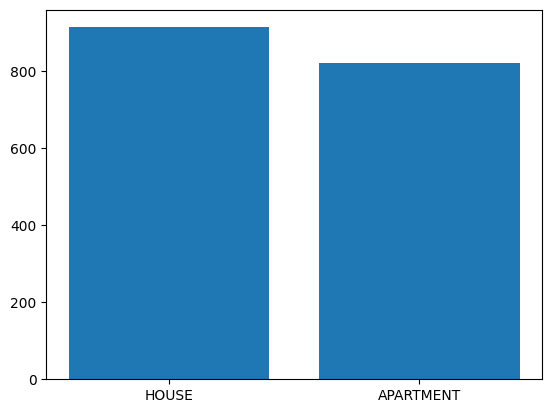

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = {"HOUSE":0, "APARTMENT":0}
for object in array_labels:
    count_classes[object] = count_classes[object] + 1 

classes = list(count_classes.keys())
values = list(count_classes.values())

plt.bar(range(len(count_classes)), values, tick_label=classes)
plt.show()

### Save images in Notebook folders

In [33]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import random

incr = 0
train_tabular_data = []
validation_tabular_data = []

for blobName in url_imagenes:
    incr += 1
    try:
        blob_service_client = BlobServiceClient.from_connection_string(conn_str=connection_string)
        blob_name = blobName
        blob_client = blob_service_client.get_blob_client(container_name, blob_name)

        stream = io.BytesIO()
        download_stream = blob_client.download_blob()

        stream.write(download_stream.readall())

        stream.seek(0)
        image = Image.open(stream)

        # Get information from URL
        id = (blobName.split("_")[0]).split("/")[1]
        tipo = blobName.split("_")[2]

        # Change traget to 0 and 1
        if (tipo == "HOUSE"):
            tipo = "0"
        else:
            tipo = "1"

        rooms = blobName.split("_")[3].split(".")[0]
        split_meters = blobName.split("_")[4]

        if "mts" in split_meters:
            meters = blobName.split("_")[4].split("mts")[0]
        # Special case of "has" instead of mts, if new class is detected print activates
        elif "has." in split_meters:
            meters = str(int(split_meters.split("has.")[0])*10000)
        else:
            print("New class of input")

        # Sort partitions 80-20 and load into folders
        if random.uniform(0, 1) > 0.2:
            image.save("images/train/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            train_tabular_data.append((rooms,meters,tipo))
        else:
            image.save("images/validation/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            validation_tabular_data.append((rooms,meters,tipo))

    except Exception as ex:
        print('Exception:')



#### Definitions

In [13]:
# Definitions
batch_size = 32
img_height = 180
img_width = 180
num_channels = 3
epochs = 30
steps_per_epoch = 30
validation_steps = 10
num_tabular_features = 2
class_names = ["HOUSE","APARTMENT"]
class_names_binary = ["0","1"]
headers = ["Cuartos","Meters","target"]


#### Save tabular data into CSVs

In [35]:
import csv 

# Save tabular data into CSV file for saving data and analyze it after
train_tabular_data = np.array(train_tabular_data)
validation_tabular_data = np.array(validation_tabular_data)

def write_csv(CSV_name, array, headers_csv):
    with open(CSV_name, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(headers_csv)
        for data in array:
            writer.writerow(data)
    
write_csv('csv_train.csv', train_tabular_data, headers)    
write_csv('csv_validation.csv', validation_tabular_data, headers)

### Plot images

HOUSE


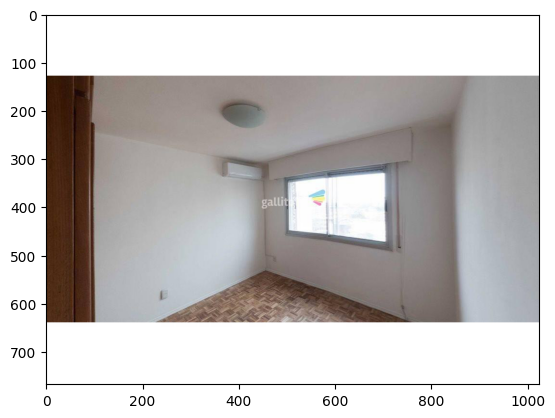

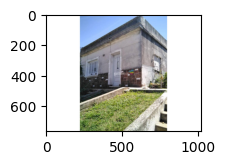

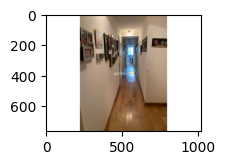

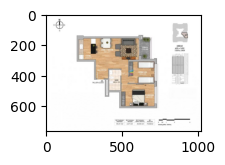

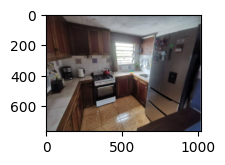

<Figure size 200x200 with 0 Axes>

APARTMENT


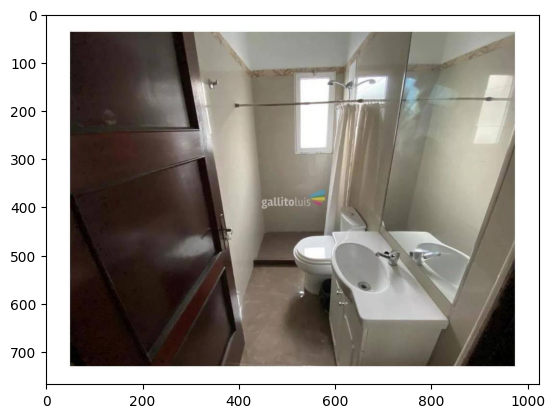

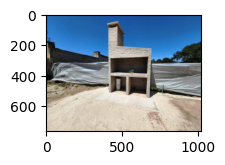

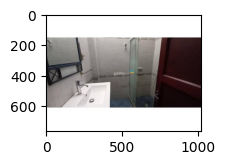

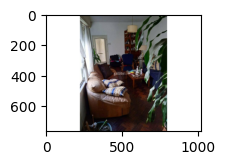

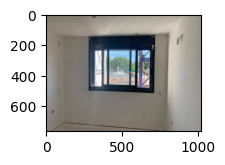

<Figure size 200x200 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import glob, random
from tensorflow.keras.utils import load_img

for class_type in class_names_binary:
    print(class_names[int(class_type)])
    i = 0
    for i in range(5):
        images = glob.glob("images/train/"+str(class_names_binary)+"/*.jpg")
        random_image = random.choice(images)

        # load the image
        img = load_img(random_image)

        plt.imshow(img)
        plt.figure(figsize=(2,2)) 
        i += 1
    plt.show()

### Dataset Generation

##### Image dataset Generation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        vertical_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'images/validation',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

Found 1408 images belonging to 2 classes.
Found 326 images belonging to 2 classes.


##### Tabular data processing

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
data_train = pd.read_csv('csv_train.csv')
data_validation = pd.read_csv('csv_validation.csv')

# Replace special characters from tabular data
data_train['Cuartos'] = data_train['Cuartos'].str.replace('D','')
data_train['Cuartos'] = data_train['Cuartos'].str.replace('+4','5')

data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('D','')
data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('+4','5')

# Split into features and target
X_train = data_train.drop('target', axis=1).astype(float).to_numpy()
y_train = data_train.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)
X_test = data_validation.drop('target', axis=1).astype(float).to_numpy()
y_test = data_validation.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)

#### Data tabular correlation

In [39]:
data_train.corr()

,Cuartos,Meters,target
Cuartos,1.000000,-0.082255,-0.491047
Meters,-0.082255,1.000000,-0.068056
target,-0.491047,-0.068056,1.000000


#### Plot data distribution

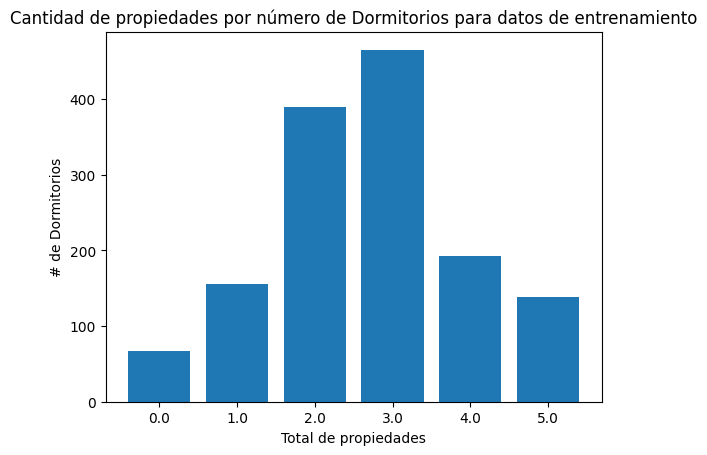

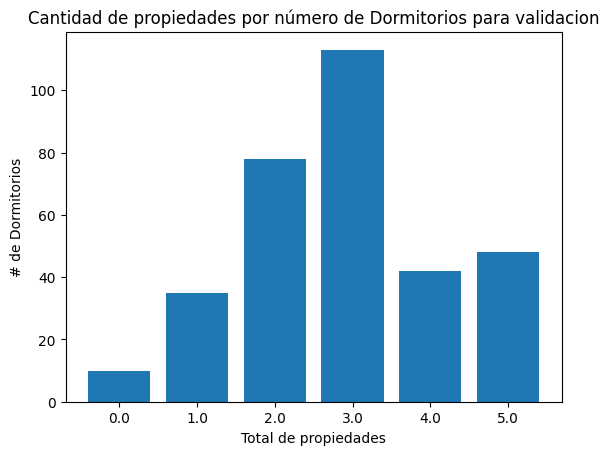

In [24]:
import numpy as np

def numpy_array_to_dict(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    result_dict = {value: count for value, count in zip(unique_values, counts)}
    return result_dict

# Example usage
dict_rooms_train = numpy_array_to_dict(X_train[:,0])
dict_rooms_val = numpy_array_to_dict(X_test[:,0])

plt.bar(range(len(dict_rooms_train)), list(dict_rooms_train.values()), tick_label=list(dict_rooms_train.keys()))
plt.title("Cantidad de propiedades por número de Dormitorios para datos de entrenamiento")
plt.xlabel("# de Dormitorios")
plt.ylabel("Total de propiedades")
plt.show()

plt.bar(range(len(dict_rooms_val)), list(dict_rooms_val.values()), tick_label=list(dict_rooms_val.keys()))
plt.title("Cantidad de propiedades por número de Dormitorios para validacion")
plt.xlabel("# de Dormitorios")
plt.ylabel("Total de propiedades")
plt.show()

/tmp/ipykernel_5181/3919784574.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_array, bins=100)


<Axes: ylabel='Density'>

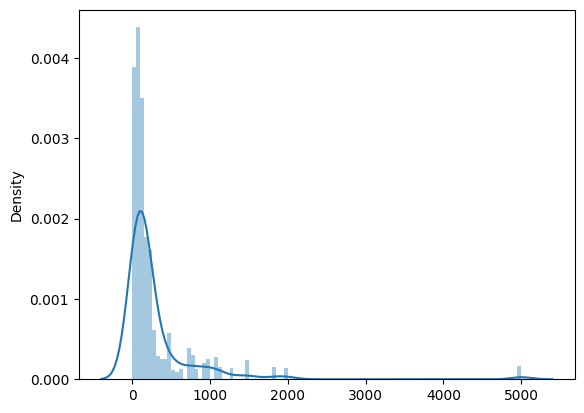

In [41]:
import seaborn as sns

#remove elements whose value is equal to max value
new_array = np.delete(X_train[:,1], np.where(X_train[:,1] == max(X_train[:,1])))
sns.distplot(new_array, bins=100)

/tmp/ipykernel_5181/3633044399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_array, bins=100)


<Axes: ylabel='Density'>

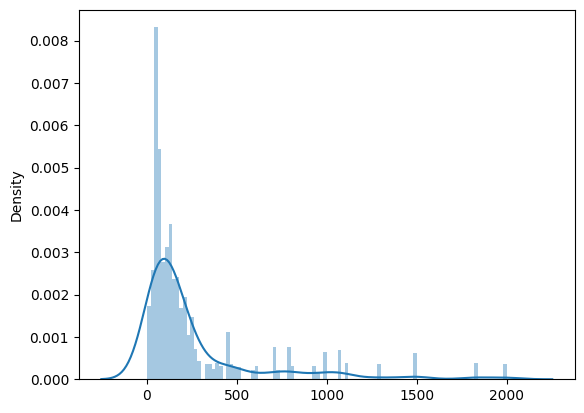

In [42]:
# Remove "outliers" 
new_array = np.delete(X_train[:,1], np.where(X_train[:,1] > 2000))
sns.distplot(new_array, bins=100)

In [27]:
# Concatenate batches of images
train_generator_concatenated=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
validation_generator_concatenated=np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])

In [28]:
# Transform targets to categorical objects
y_train = tf.keras.utils.to_categorical(y_train, len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

### Model Definition

Concatenación de 2 modelos, el primero para el procesamiento de imagenes utilizando Conv2D, MaxPooling2D y Flatten y el segundo para los datos tabulares. Ambas contienen layers de Batchnormalization y Dropout para mejorar el modelo a que no caiga en overfitting tan rápido y terminan concatenadas teniendo como salida un softmax sobre 2 outputs.

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Image data Processing Branch
image_input = Input(shape=(img_height, img_width, num_channels))
conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
batch1 = BatchNormalization()(pool1)
conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
batch2 = BatchNormalization()(pool2)
flatten = Flatten()(batch2)
drop1 = Dropout(rate = 0.4)(flatten)
image_features = Dense(128, activation='relu')(drop1)

# Tabular Data Processing Branch
tabular_input = Input(shape=(num_tabular_features,))
dense1 = Dense(128, activation='relu')(tabular_input)
drop2 = Dropout(rate = 0.4)(dense1)
tabular_features = Dense(64, activation='relu')(drop2)

# Fusion Layer
concatenated = Concatenate()([image_features, tabular_features])
drop3 = Dropout(rate = 0.4)(concatenated)
fusion_layer = Dense(192, activation='relu')(drop3)

# Output Layer
output = Dense(2, activation='softmax')(fusion_layer)

# Create the model
model = Model(inputs=[image_input, tabular_input], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 178, 178, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 89, 89, 64)   0           ['conv2d[0][0]']                 
                                                                                              

### Model compilation

Ejecución del modelo para primeras pruebas, con el objetivo de poder llegar a obtener un modelo que pueda utilizar los datos de imágenes y los datos tabulares procesados previamente.

In [14]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Execution of model

history = model.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = validation_steps)

Epoch 1/10
30/30 [==============================] - 42s 1s/step - loss: 2.5292 - accuracy: 0.6884 - val_loss: 0.9341 - val_accuracy: 0.6982
Epoch 2/10
30/30 [==============================] - 40s 1s/step - loss: 0.9510 - accuracy: 0.7271 - val_loss: 2.0043 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 40s 1s/step - loss: 0.8599 - accuracy: 0.7264 - val_loss: 1.1260 - val_accuracy: 0.6420
Epoch 4/10
30/30 [==============================] - 40s 1s/step - loss: 0.6333 - accuracy: 0.7607 - val_loss: 1.8574 - val_accuracy: 0.5444
Epoch 5/10
30/30 [==============================] - 40s 1s/step - loss: 0.5385 - accuracy: 0.7901 - val_loss: 0.7507 - val_accuracy: 0.6568
Epoch 6/10
30/30 [==============================] - 40s 1s/step - loss: 0.4203 - accuracy: 0.8288 - val_loss: 1.2495 - val_accuracy: 0.6095
Epoch 7/10
30/30 [==============================] - 40s 1s/step - loss: 0.3750 - accuracy: 0.8582 - val_loss: 0.9120 - val_accuracy: 0.6598
Epoch 8/10
30/30 [==

## WANDB

In [30]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

# Account Key
wandb.login(key="bb15b17a6eb09e20bb877cebbceb375ade025b37")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: bastarrica-felipe (bgm-team). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/azureuser/.netrc


True

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
from tensorflow_model_optimization.sparsity import keras as sparsity

model_history = []

# Launch 2 experiments, trying different dropout rates
for run in range(2):
    
    # Start a run, tracking hyperparameters
    wandb.init(
        project="ml-en-produccion",
        config={
        
            "activation_1": "relu",
            "img_height": 180,
            "img_width": 180,
            "dropout": random.uniform(0.01, 0.80),
            "optimizer": "adam",
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 20,
            "batch_size": 32,
            "steps_per_epoch":30,
            "validation_steps":10,
            "initial_sparsity": 0.0,
            "final_sparsity": 0.5,
            "begin_step": 200,
            "end_step": 4000
        },
    )
    config = wandb.config
    

    # Define tu modelo
    
    image_input = Input(shape=(img_height, img_width, num_channels))
    conv1 = Conv2D(64, kernel_size=(3, 3), activation=config.activation_1)(image_input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, kernel_size=(3, 3), activation=config.activation_1)(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flatten = Flatten()(pool2)
    image_features = Dense(128, activation=config.activation_1)(flatten)

    # Tabular Data Processing Branch
    tabular_input = Input(shape=(num_tabular_features,))
    tabular_features = Dense(64, activation=config.activation_1)(tabular_input)

    # Fusion Layer
    concatenated = Concatenate()([image_features, tabular_features])
    fusion_layer = Dense(64, activation=config.activation_1)(concatenated)

    # Output layer
    output = Dense(2, activation='softmax')(fusion_layer)
    # Create the model
    model = Model(inputs=[image_input, tabular_input], outputs=output)
    # Compila y entrena el modelo
    model.compile(optimizer=config.optimizer, loss=config.loss,  metrics=[config.metric])

    # Early stopping TODO
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
    wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
    '''
    history = model.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback])
    '''
    
    # Addition of Pruning Parameters
    pruning_params = {
        'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=config.initial_sparsity,
                                                    final_sparsity=config.final_sparsity,
                                                    begin_step=config.begin_step,
                                                    end_step=config.end_step)
    }

    # Envolver el modelo con las capas de pruning. Esto agregará una operación de pruning a cada capa de nuestro modelo.
    model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)

    # Necesitamos recompilar el modelo después de agregar las capas de pruning.
    model_for_pruning.compile(optimizer='adam', 
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

    # Entrenar el modelo con callbacks para habilitar pruning. 
    # El callback UpdatePruningStep asegurará que el estado del pruning se actualiza en cada paso de entrenamiento.
    pruning_callbacks = [
    sparsity.UpdatePruningStep(),
    ]
    
    history = model_for_pruning.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback, pruning_callbacks])

    model_history.append(history)

    wandb.finish()

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 2.1523 - accuracy: 0.6797

INFO:tensorflow:Assets written to: my_model_01/assets


INFO:tensorflow:Assets written to: my_model_01/assets
wandb: Adding directory to artifact (./my_model_01)... Done. 10.3s


30/30 [==============================] - 67s 2s/step - loss: 2.1523 - accuracy: 0.6797 - val_loss: 0.5976 - val_accuracy: 0.7331
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 0.5033 - accuracy: 0.7628

INFO:tensorflow:Assets written to: my_model_02/assets


INFO:tensorflow:Assets written to: my_model_02/assets
wandb: Adding directory to artifact (./my_model_02)... Done. 10.6s


30/30 [==============================] - 63s 2s/step - loss: 0.5033 - accuracy: 0.7628 - val_loss: 0.4840 - val_accuracy: 0.7577
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.7614

INFO:tensorflow:Assets written to: my_model_03/assets


INFO:tensorflow:Assets written to: my_model_03/assets
wandb: Adding directory to artifact (./my_model_03)... Done. 11.3s


30/30 [==============================] - 65s 2s/step - loss: 0.4801 - accuracy: 0.7614 - val_loss: 0.4342 - val_accuracy: 0.7975
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.7962

INFO:tensorflow:Assets written to: my_model_04/assets


INFO:tensorflow:Assets written to: my_model_04/assets
wandb: Adding directory to artifact (./my_model_04)... Done. 9.6s


30/30 [==============================] - 64s 2s/step - loss: 0.4339 - accuracy: 0.7962 - val_loss: 0.4599 - val_accuracy: 0.7607
Epoch 5/20
30/30 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.8189

INFO:tensorflow:Assets written to: my_model_05/assets


INFO:tensorflow:Assets written to: my_model_05/assets
wandb: Adding directory to artifact (./my_model_05)... Done. 8.7s


30/30 [==============================] - 61s 2s/step - loss: 0.3978 - accuracy: 0.8189 - val_loss: 0.4899 - val_accuracy: 0.7577
Epoch 6/20
30/30 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8359

INFO:tensorflow:Assets written to: my_model_06/assets


INFO:tensorflow:Assets written to: my_model_06/assets
wandb: Adding directory to artifact (./my_model_06)... Done. 12.2s


30/30 [==============================] - 65s 2s/step - loss: 0.3535 - accuracy: 0.8359 - val_loss: 0.4768 - val_accuracy: 0.7761
Epoch 7/20
30/30 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9105

INFO:tensorflow:Assets written to: my_model_07/assets


INFO:tensorflow:Assets written to: my_model_07/assets
wandb: Adding directory to artifact (./my_model_07)... Done. 8.7s


30/30 [==============================] - 69s 2s/step - loss: 0.2448 - accuracy: 0.9105 - val_loss: 0.5519 - val_accuracy: 0.7638
Epoch 8/20
30/30 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9474

INFO:tensorflow:Assets written to: my_model_08/assets


INFO:tensorflow:Assets written to: my_model_08/assets
wandb: Adding directory to artifact (./my_model_08)... Done. 10.3s


30/30 [==============================] - 64s 2s/step - loss: 0.1494 - accuracy: 0.9474 - val_loss: 1.1065 - val_accuracy: 0.7117
Epoch 9/20
30/30 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9652

INFO:tensorflow:Assets written to: my_model_09/assets


INFO:tensorflow:Assets written to: my_model_09/assets
wandb: Adding directory to artifact (./my_model_09)... Done. 9.0s


30/30 [==============================] - 62s 2s/step - loss: 0.1041 - accuracy: 0.9652 - val_loss: 0.9748 - val_accuracy: 0.7454
Epoch 10/20
30/30 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9872

INFO:tensorflow:Assets written to: my_model_10/assets


INFO:tensorflow:Assets written to: my_model_10/assets
wandb: Adding directory to artifact (./my_model_10)... Done. 8.9s


30/30 [==============================] - 73s 2s/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 1.1099 - val_accuracy: 0.7331
Epoch 11/20
30/30 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9936

INFO:tensorflow:Assets written to: my_model_11/assets


INFO:tensorflow:Assets written to: my_model_11/assets
wandb: Adding directory to artifact (./my_model_11)... Done. 10.6s


30/30 [==============================] - 65s 2s/step - loss: 0.0276 - accuracy: 0.9936 - val_loss: 1.2362 - val_accuracy: 0.7117
Epoch 12/20
30/30 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9986

INFO:tensorflow:Assets written to: my_model_12/assets


INFO:tensorflow:Assets written to: my_model_12/assets
wandb: Adding directory to artifact (./my_model_12)... Done. 9.8s


30/30 [==============================] - 64s 2s/step - loss: 0.0121 - accuracy: 0.9986 - val_loss: 1.3610 - val_accuracy: 0.7270
Epoch 13/20
30/30 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

INFO:tensorflow:Assets written to: my_model_13/assets


INFO:tensorflow:Assets written to: my_model_13/assets
wandb: Adding directory to artifact (./my_model_13)... Done. 10.7s


30/30 [==============================] - 65s 2s/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 1.5014 - val_accuracy: 0.7147
Epoch 14/20
30/30 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9993

INFO:tensorflow:Assets written to: my_model_14/assets


INFO:tensorflow:Assets written to: my_model_14/assets
wandb: Adding directory to artifact (./my_model_14)... Done. 10.0s


30/30 [==============================] - 73s 2s/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 1.5687 - val_accuracy: 0.7178
Epoch 15/20
30/30 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9993

INFO:tensorflow:Assets written to: my_model_15/assets


INFO:tensorflow:Assets written to: my_model_15/assets
wandb: Adding directory to artifact (./my_model_15)... Done. 8.9s


30/30 [==============================] - 63s 2s/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 1.7633 - val_accuracy: 0.7086
Epoch 16/20
30/30 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9993

INFO:tensorflow:Assets written to: my_model_16/assets


INFO:tensorflow:Assets written to: my_model_16/assets
wandb: Adding directory to artifact (./my_model_16)... Done. 8.6s


30/30 [==============================] - 64s 2s/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 1.8023 - val_accuracy: 0.7025
Epoch 17/20
30/30 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_17/assets


INFO:tensorflow:Assets written to: my_model_17/assets
wandb: Adding directory to artifact (./my_model_17)... Done. 10.3s


30/30 [==============================] - 73s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8670 - val_accuracy: 0.6963
Epoch 18/20
30/30 [==============================] - ETA: 0s - loss: 8.3930e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_18/assets


INFO:tensorflow:Assets written to: my_model_18/assets
wandb: Adding directory to artifact (./my_model_18)... Done. 9.3s


30/30 [==============================] - 64s 2s/step - loss: 8.3930e-04 - accuracy: 1.0000 - val_loss: 1.9857 - val_accuracy: 0.6963
Epoch 19/20
30/30 [==============================] - ETA: 0s - loss: 5.9249e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_19/assets


INFO:tensorflow:Assets written to: my_model_19/assets
wandb: Adding directory to artifact (./my_model_19)... Done. 11.5s


30/30 [==============================] - 66s 2s/step - loss: 5.9249e-04 - accuracy: 1.0000 - val_loss: 2.0612 - val_accuracy: 0.7117
Epoch 20/20
30/30 [==============================] - ETA: 0s - loss: 3.8135e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_20/assets


INFO:tensorflow:Assets written to: my_model_20/assets
wandb: Adding directory to artifact (./my_model_20)... Done. 9.2s


30/30 [==============================] - 74s 3s/step - loss: 3.8135e-04 - accuracy: 1.0000 - val_loss: 2.0268 - val_accuracy: 0.7055


epoch/accuracy,▁▃▃▄▄▄▆▇▇███████████
epoch/epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▄▅█▅▅▇▆▂▄▄▂▃▂▂▂▁▁▁▂▂
epoch/val_loss,▂▁▁▁▁▁▂▄▃▄▄▅▆▆▇▇▇███
epoch/accuracy,1.0
epoch/epoch,19
epoch/learning_rate,0.001
epoch/loss,0.00038
epoch/val_accuracy,0.70552


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 16.5275 - accuracy: 0.7301

INFO:tensorflow:Assets written to: my_model_01/assets


INFO:tensorflow:Assets written to: my_model_01/assets
wandb: Adding directory to artifact (./my_model_01)... Done. 10.3s


30/30 [==============================] - 73s 2s/step - loss: 16.5275 - accuracy: 0.7301 - val_loss: 0.5802 - val_accuracy: 0.7270
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.7543

INFO:tensorflow:Assets written to: my_model_02/assets


INFO:tensorflow:Assets written to: my_model_02/assets
wandb: Adding directory to artifact (./my_model_02)... Done. 8.6s


30/30 [==============================] - 62s 2s/step - loss: 0.5216 - accuracy: 0.7543 - val_loss: 0.4760 - val_accuracy: 0.7515
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.5424 - accuracy: 0.7429

INFO:tensorflow:Assets written to: my_model_03/assets


INFO:tensorflow:Assets written to: my_model_03/assets
wandb: Adding directory to artifact (./my_model_03)... Done. 8.8s


30/30 [==============================] - 65s 2s/step - loss: 0.5424 - accuracy: 0.7429 - val_loss: 0.5303 - val_accuracy: 0.7423
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.8054

INFO:tensorflow:Assets written to: my_model_04/assets


INFO:tensorflow:Assets written to: my_model_04/assets
wandb: Adding directory to artifact (./my_model_04)... Done. 10.1s


30/30 [==============================] - 66s 2s/step - loss: 0.4611 - accuracy: 0.8054 - val_loss: 0.4567 - val_accuracy: 0.7638
Epoch 5/20
30/30 [==============================] - ETA: 0s - loss: 0.3579 - accuracy: 0.8480

INFO:tensorflow:Assets written to: my_model_05/assets


INFO:tensorflow:Assets written to: my_model_05/assets
wandb: Adding directory to artifact (./my_model_05)... Done. 9.5s


30/30 [==============================] - 65s 2s/step - loss: 0.3579 - accuracy: 0.8480 - val_loss: 0.5598 - val_accuracy: 0.7515
Epoch 6/20
30/30 [==============================] - ETA: 0s - loss: 0.2743 - accuracy: 0.8864

INFO:tensorflow:Assets written to: my_model_06/assets


INFO:tensorflow:Assets written to: my_model_06/assets
wandb: Adding directory to artifact (./my_model_06)... Done. 10.3s


30/30 [==============================] - 66s 2s/step - loss: 0.2743 - accuracy: 0.8864 - val_loss: 0.9105 - val_accuracy: 0.7454
Epoch 7/20
30/30 [==============================] - ETA: 0s - loss: 0.2824 - accuracy: 0.8743

INFO:tensorflow:Assets written to: my_model_07/assets


INFO:tensorflow:Assets written to: my_model_07/assets
wandb: Adding directory to artifact (./my_model_07)... Done. 9.3s


30/30 [==============================] - 74s 2s/step - loss: 0.2824 - accuracy: 0.8743 - val_loss: 1.0791 - val_accuracy: 0.6350
Epoch 8/20
30/30 [==============================] - ETA: 0s - loss: 0.1566 - accuracy: 0.9425

INFO:tensorflow:Assets written to: my_model_08/assets


INFO:tensorflow:Assets written to: my_model_08/assets
wandb: Adding directory to artifact (./my_model_08)... Done. 10.1s


30/30 [==============================] - 66s 2s/step - loss: 0.1566 - accuracy: 0.9425 - val_loss: 1.0105 - val_accuracy: 0.7362
Epoch 9/20
30/30 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9830

INFO:tensorflow:Assets written to: my_model_09/assets


INFO:tensorflow:Assets written to: my_model_09/assets
wandb: Adding directory to artifact (./my_model_09)... Done. 10.3s


30/30 [==============================] - 67s 2s/step - loss: 0.0647 - accuracy: 0.9830 - val_loss: 0.9766 - val_accuracy: 0.7301
Epoch 10/20
30/30 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9972

INFO:tensorflow:Assets written to: my_model_10/assets


INFO:tensorflow:Assets written to: my_model_10/assets
wandb: Adding directory to artifact (./my_model_10)... Done. 9.6s


30/30 [==============================] - 74s 2s/step - loss: 0.0266 - accuracy: 0.9972 - val_loss: 1.3603 - val_accuracy: 0.7055
Epoch 11/20
30/30 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9979

INFO:tensorflow:Assets written to: my_model_11/assets


INFO:tensorflow:Assets written to: my_model_11/assets
wandb: Adding directory to artifact (./my_model_11)... Done. 9.4s


30/30 [==============================] - 65s 2s/step - loss: 0.0158 - accuracy: 0.9979 - val_loss: 1.4454 - val_accuracy: 0.7270
Epoch 12/20
30/30 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9993

INFO:tensorflow:Assets written to: my_model_12/assets


INFO:tensorflow:Assets written to: my_model_12/assets
wandb: Adding directory to artifact (./my_model_12)... Done. 9.9s


30/30 [==============================] - 67s 2s/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 1.5097 - val_accuracy: 0.7147
Epoch 13/20
30/30 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_13/assets


INFO:tensorflow:Assets written to: my_model_13/assets
wandb: Adding directory to artifact (./my_model_13)... Done. 10.6s


30/30 [==============================] - 68s 2s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.6340 - val_accuracy: 0.7178
Epoch 14/20
30/30 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9993

INFO:tensorflow:Assets written to: my_model_14/assets


INFO:tensorflow:Assets written to: my_model_14/assets
wandb: Adding directory to artifact (./my_model_14)... Done. 8.9s


30/30 [==============================] - 74s 2s/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 1.8058 - val_accuracy: 0.7209
Epoch 15/20
30/30 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_15/assets


INFO:tensorflow:Assets written to: my_model_15/assets
wandb: Adding directory to artifact (./my_model_15)... Done. 9.5s


30/30 [==============================] - 68s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9341 - val_accuracy: 0.7117
Epoch 16/20
30/30 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_16/assets


INFO:tensorflow:Assets written to: my_model_16/assets
wandb: Adding directory to artifact (./my_model_16)... Done. 9.0s


30/30 [==============================] - 65s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0553 - val_accuracy: 0.7117
Epoch 17/20
30/30 [==============================] - ETA: 0s - loss: 9.2534e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_17/assets


INFO:tensorflow:Assets written to: my_model_17/assets
wandb: Adding directory to artifact (./my_model_17)... Done. 11.5s


30/30 [==============================] - 75s 3s/step - loss: 9.2534e-04 - accuracy: 1.0000 - val_loss: 2.0612 - val_accuracy: 0.7055
Epoch 18/20
30/30 [==============================] - ETA: 0s - loss: 7.7495e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_18/assets


INFO:tensorflow:Assets written to: my_model_18/assets
wandb: Adding directory to artifact (./my_model_18)... Done. 11.2s


30/30 [==============================] - 69s 2s/step - loss: 7.7495e-04 - accuracy: 1.0000 - val_loss: 2.1118 - val_accuracy: 0.7147
Epoch 19/20
30/30 [==============================] - ETA: 0s - loss: 5.3981e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_19/assets


INFO:tensorflow:Assets written to: my_model_19/assets
wandb: Adding directory to artifact (./my_model_19)... Done. 9.8s


30/30 [==============================] - 68s 2s/step - loss: 5.3981e-04 - accuracy: 1.0000 - val_loss: 2.2231 - val_accuracy: 0.7086
Epoch 20/20
30/30 [==============================] - ETA: 0s - loss: 4.8487e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: my_model_20/assets


INFO:tensorflow:Assets written to: my_model_20/assets
wandb: Adding directory to artifact (./my_model_20)... Done. 9.8s


30/30 [==============================] - 76s 3s/step - loss: 4.8487e-04 - accuracy: 1.0000 - val_loss: 2.2799 - val_accuracy: 0.7147


epoch/accuracy,▁▂▁▃▄▅▅▇████████████
epoch/epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▆▇▇█▇▇▁▇▆▅▆▅▆▆▅▅▅▅▅▅
epoch/val_loss,▁▁▁▁▁▃▃▃▃▄▅▅▆▆▇▇▇▇██
epoch/accuracy,1.0
epoch/epoch,19
epoch/learning_rate,0.001
epoch/loss,0.00048
epoch/val_accuracy,0.71472


### Plot metrics

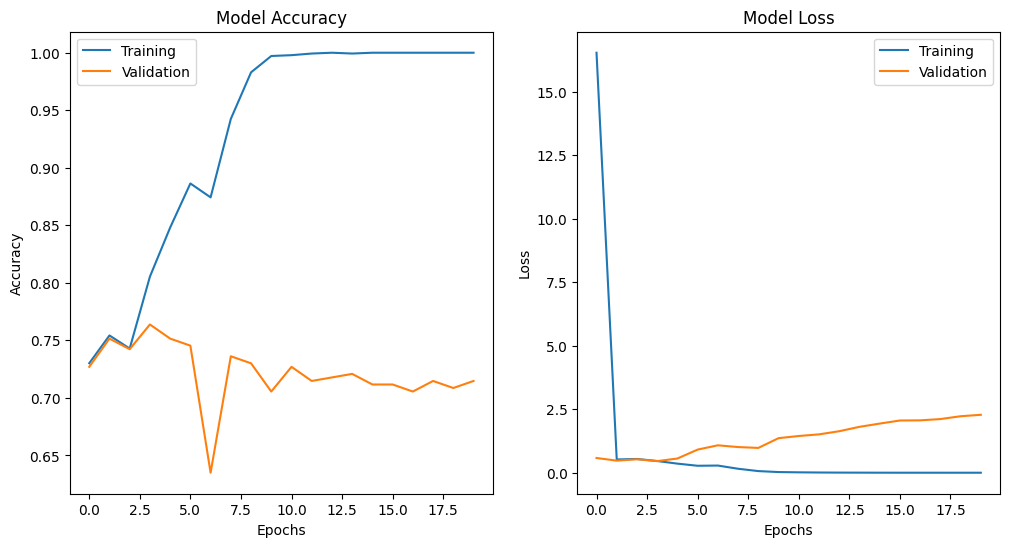

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model_for_pruning.save('conv_model.h5')

#### Single object prediction

In [49]:
# For testing, convert image to tensor and add dimension in first position
def input_conversion (image, tabular):
    tensor_img = tf.convert_to_tensor(image)
    tensor_tab = tf.convert_to_tensor(tabular)
    tensor_img = tf.expand_dims(tensor_img, 0)
    tensor_tab = tf.expand_dims(tensor_tab, 0)
    return tensor_img,tensor_tab

tensor_img, tensor_tab = input_conversion (validation_generator_concatenated[2], X_test[2])


In [51]:
# Make a simple prediction
prediction = model.predict((tensor_img,tensor_tab))
print (prediction)

1/1 [==============================] - 0s 140ms/step
[[0.36130413 0.6386959 ]]


### Gradio

In [1]:
import numpy as np

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('conv_categorical_imgtab.h5')

def classify_image(image, rooms, meters):
    image = np.expand_dims(image, axis=0)
    tabular = np.expand_dims([rooms,meters], axis=0).astype(float)
    prediction = model.predict([image,tabular])

    # Obtiene las etiquetas de las clases
    # Devuelve un diccionario con las etiquetas de las clases y sus probabilidades correspondientes
    return {class_names[i]: float(prediction[0][i]) for i in range(len(class_names))}


2023-06-25 21:12:06.049887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 21:12:10.597677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-25 21:12:17.903150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image,  # Classification Function
    inputs=[gr.inputs.Image(shape=(img_height, img_width)), gr.inputs.Slider(0,5,label="Dormitorios", step=1), gr.inputs.Slider(0,5000,label="M2")], # Inputs
    outputs=gr.outputs.Label(num_top_classes=len(class_names)),  # Output
)
iface.launch(share=True, debug=True)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported i

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3df00c071ff1b8f5da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 1s 895ms/st
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 63ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 64ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 63ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 63ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 62ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 63ms/ste
(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 0s 61ms/ste
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3df00c071ff1b8f5da.gradio.live
